In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [21]:
df = pd.read_csv('Exasens.csv', sep=',')

In [22]:
df 

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN,NaN,NaN
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN,NaN,NaN
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN,NaN,NaN
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    object 
 1   ID              399 non-null    object 
 2   Imaginary Part  101 non-null    object 
 3   Unnamed: 3      101 non-null    object 
 4   Real Part       101 non-null    object 
 5   Unnamed: 5      101 non-null    object 
 6   Gender          399 non-null    float64
 7   Age             399 non-null    float64
 8   Smoking         399 non-null    float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     3 non-null      object 
 12  Unnamed: 12     4 non-null      object 
dtypes: float64(5), object(8)
memory usage: 40.9+ KB


In [25]:
df['Diagnosis'].value_counts()

HC          160
Asthma       80
Infected     80
COPD         79
Name: Diagnosis, dtype: int64

In [26]:
df["Diagnosis"] = df["Diagnosis"].map({"HC": 0,
                                       "Asthma": 1,
                                       "Infected": 2,
                                       "COPD": 3})

In [27]:
df['ID'].value_counts()

301-4    1
A236     1
A234     1
A233     1
A232     1
        ..
52-4     1
51-4     1
50       1
49       1
I180     1
Name: ID, Length: 399, dtype: int64

In [28]:
df = df.drop(['ID'], axis=1)  # удалим айди так как оно не нужно
df

,Diagnosis,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,3.0,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,3.0,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,3.0,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
...,...,...,...,...,...,...,...,...,...,...,...,...
396,2.0,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN,NaN,NaN
397,2.0,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN,NaN,NaN
398,2.0,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN,NaN,NaN
399,2.0,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN,NaN,NaN


In [29]:
df['Gender'].value_counts() # пол перекодировать не надо, так как он задан 0 и 1

0.0    240
1.0    159
Name: Gender, dtype: int64

In [30]:
df['Smoking'].value_counts() #тоже не надо перекодировать

1.0    179
2.0    150
3.0     70
Name: Smoking, dtype: int64

In [31]:
df = df.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1)  # удалим эти столбцы, так как они пусты
df

,Diagnosis,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,Gender,Somking
2,3.0,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,Male=1,Non-smoker=1
3,3.0,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,Female=0,Ex-smoker=2
4,3.0,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,Active-smoker=3
...,...,...,...,...,...,...,...,...,...,...
396,2.0,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN
397,2.0,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN
398,2.0,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN
399,2.0,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN


In [32]:
#из столбца Unnamed: 11 понятно, что male=1, female=0, удалим теперь столбец
#из столбца Unnamed: 12 понятно, что non-smoker=1, ex-smpker=2, active-smoker=3, тоже удаляем
df = df.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1) 
df

,Diagnosis,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN
2,3.0,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,3.0,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,3.0,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
...,...,...,...,...,...,...,...,...
396,2.0,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,2.0,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,2.0,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,2.0,NaN,NaN,NaN,NaN,1.0,51.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    float64
 1   Imaginary Part  101 non-null    object 
 2   Unnamed: 3      101 non-null    object 
 3   Real Part       101 non-null    object 
 4   Unnamed: 5      101 non-null    object 
 5   Gender          399 non-null    float64
 6   Age             399 non-null    float64
 7   Smoking         399 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.2+ KB


In [39]:
#удалим 1 и 2 строки из датасета, 1 строка пуста, из 2 строки понятно, что в столбцах Imaginary/Real Part минимальные значения,
#а в столбцах Unnamed: 3/5 - средние
df.drop(labels=[0,1], axis=0, inplace=True)

KeyError: '[0, 1] not found in axis'

In [40]:
df.index = [i for i in range(0, 399)]
df

,Diagnosis,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking
0,3.0,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
1,3.0,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
2,3.0,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
3,3.0,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
4,3.0,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0
...,...,...,...,...,...,...,...,...
394,2.0,NaN,NaN,NaN,NaN,0.0,49.0,2.0
395,2.0,NaN,NaN,NaN,NaN,0.0,37.0,1.0
396,2.0,NaN,NaN,NaN,NaN,0.0,29.0,1.0
397,2.0,NaN,NaN,NaN,NaN,1.0,51.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    float64
 1   Imaginary Part  100 non-null    float64
 2   Unnamed: 3      100 non-null    float64
 3   Real Part       100 non-null    float64
 4   Unnamed: 5      100 non-null    float64
 5   Gender          399 non-null    float64
 6   Age             399 non-null    float64
 7   Smoking         399 non-null    float64
dtypes: float64(8)
memory usage: 28.1 KB


In [42]:
#преобразуем тип object в float
df['Imaginary Part'] = df['Imaginary Part'].astype(float)
df['Real Part'] = df['Real Part'].astype(float)
df['Unnamed: 5'] = df['Unnamed: 5'].astype(float)
df['Unnamed: 3'] = df['Unnamed: 3'].astype(float)

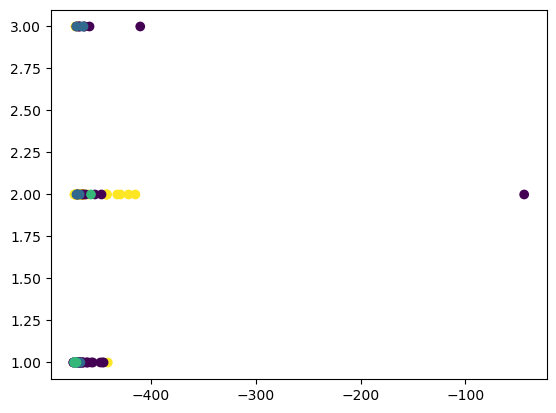

In [51]:
plt.scatter(df['Unnamed: 5'], df['Smoking'], c=df['Diagnosis'])#c='Gender'
#plt.scatter(df['Unnamed: 3'], df['Smoking'], c=df['Diagnosis'])
#plt.scatter(df['Imaginary Part'], df['Smoking'], c=df['Diagnosis'])
#plt.scatter(df['Real Part'], df['Smoking'], c=df['Diagnosis'])
#по графикам видно, что между оставшимися переменными нет никакой зависимости

In [52]:
#так как предсказать диагноз надо с помощью Imaginary Part, Real Part, Unnamed: 3, Unnamed: 5 (по условию задачи), то эти столбцы надо заполнить
#тут очень много пропущенных значений (примерно 300 из 400), и не хватает данных, чтобы понять, чем вообще надо заполнять,
#поэтому заполним средним
df['Imaginary Part'] = df['Imaginary Part'].fillna(np.mean(df['Imaginary Part']))
df['Real Part'] = df['Real Part'].fillna(np.mean(df['Real Part']))
df['Unnamed: 5'] = df['Unnamed: 5'].fillna(np.mean(df['Unnamed: 5']))
df['Unnamed: 3'] = df['Unnamed: 3'].fillna(np.mean(df['Unnamed: 3']))

In [53]:
y = df["Diagnosis"]  # вытаскивает(удаляет из таблицы) - мы должны спрогнозировать это значение
df.drop("Diagnosis", axis=1, inplace=True)
x = df

In [116]:
log_r = LogisticRegression(max_iter=10000)  # создали алгоритм
log_r.fit(x, y)  # обучили
print(log_r.score(x, y)) # сработало при max_iter=3000 (до этого было 1000 и 2000)
np.mean(cross_val_score(log_r,x,y)) # сработало при max_iter=10000 (было 3000, 5000)

0.556390977443609


0.5265506329113924

In [68]:
#улучшим модель
log_r_pol_regr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', LogisticRegression(max_iter=1000000, C=0.1))])#результат появился при max_iter=10^6, до этого пробовались 10^5,4,3
log_r_pol_regr.fit(x, y)
a = np.mean(cross_val_score(log_r_pol_regr, x, y))
a

0.5039556962025317

In [80]:
gnb = GaussianNB(var_smoothing=1.0e-10)
gnb.fit(x, y)
a = np.mean(cross_val_score(gnb, x, y))
a
#var_smoothing=1.0e-1    0.35082278481012663
#var_smoothing=1.0e-2    0.35082278481012663
#var_smoothing=1.0e-3    0.3481962025316455
#var_smoothing=1.0e-10   0.34060126582278477
#после -10 степени результат особо не меняется, а так и остаётся где-то 0.34

0.34060126582278477

In [91]:
mn = MinMaxScaler()
x_scaled = mn.fit_transform(x)

mnb = MultinomialNB(alpha=0.0000001) 
mnb.fit(x_scaled, y)
a = np.mean(cross_val_score(mnb, x_scaled, y))
a
#при изменении alpha особо ничего не меняется, значение всегда остаётся в пределах 0.4

0.4010126582278481

In [110]:
dtc = DecisionTreeClassifier(criterion='gini', 
                             max_depth=1000, 
                             min_samples_split=100)
dtc.fit(x, y)
print(dtc.score(x, y))
np.mean(cross_val_score(dtc, x, y))
# max_depth=10, min_samples_split=5      0.681704260651629     0.46379746835443036   criterion='entropy'
# max_depth=100, min_samples_split=70    0.6165413533834586    0.5465822784810127    criterion='entropy'
# max_depth=1000, min_samples_split=100  0.5839598997493735    0.5589873417721519   criterion='gini'
# при дальнейшем увеличении max_depth, min_samples_split значения будут примерно   0.40100250626566414   0.4010126582278481

0.5839598997493735


0.5589873417721519

In [ ]:
# в результате лучшей моделью оказалась DecisionTreeClassifier c результатом 0.5589873417721519